In [1]:
# Libreria:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
total_data=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3]:
total_data.shape

(3140, 108)

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


Base de datos compuesta de 3140 filas y 108 columnas.
Variables numéricas 106 y dos variables objeto.

Target: 'Obesity_number'

DUPLICADOS

In [5]:
total_data.duplicated().sum()

np.int64(0)

No encontramos duplicados.

ELIMINAR INFORMACIÓN IRRELEVANTE

In [6]:
total_data=total_data[["STATE_NAME",'Heart disease_number','diabetes_number','Obesity_number','Two or more races pop','0-9', '20-29', '30-39', '40-49','50-59','80+','Unemployed_2018','Total nurse practitioners (2019)','Total physician assistants (2019)','Total Hospitals (2019)','Total Specialist Physicians (2019)']]

Analizamos correlación con aquellas variables relacionadas con las carácteristicas demográficas y servicios de salud de los que dispone la problación.

In [7]:
total_data.head()

,STATE_NAME,Heart disease_number,diabetes_number,Obesity_number,Two or more races pop,0-9,20-29,30-39,40-49,50-59,80+,Unemployed_2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Total Specialist Physicians (2019)
0,Alabama,3345,5462,15193,1016,6787,6878,7089,7582,7738,2014,942,28.859137,6.085786,1.148905,72.142154
1,Alabama,13414,20520,50761,3891,24757,23579,25213,27338,29986,9368,3393,113.162114,23.863512,4.505074,282.882982
2,Alabama,2159,3870,8013,307,2732,3268,3201,3074,3278,1048,433,12.914231,2.723340,0.514126,32.283033
3,Alabama,1533,2511,6894,242,2456,3029,3113,3038,3115,785,344,11.626493,2.451783,0.462860,29.063942
4,Alabama,4101,6017,15112,801,7095,6742,6884,7474,7844,2335,878,30.021267,6.330854,1.195171,75.047251


ANÁLISIS DE VARIABLES UNIVARIANTES

In [8]:
num = ['int64']
cat = ['O']
continuas=['float64']

df_num = total_data.select_dtypes(num)
df_cat = total_data.select_dtypes(cat)
df_continuas=total_data.select_dtypes(continuas)

In [9]:
df_cat.head()

,STATE_NAME
0,Alabama
1,Alabama
2,Alabama
3,Alabama
4,Alabama


In [10]:
import json
ng = list(total_data["STATE_NAME"].unique())
STATE_NAME_n = dict(zip(ng, list(range(len(ng)))))

with open('/workspaces/Regr_Lineal_Regularizada/data/processed/STATE_NAME_N.json', 'w') as f:
    json.dump(STATE_NAME_n, f)

total_data["STATE_NAME_N"]=total_data["STATE_NAME"].map(STATE_NAME_n)

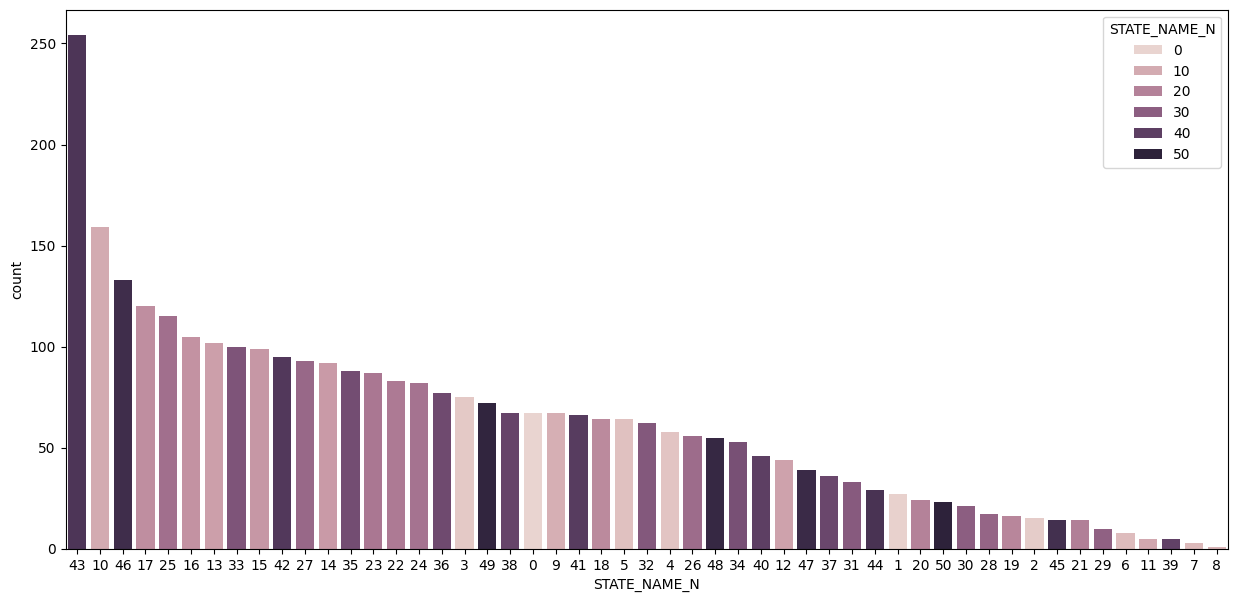

In [11]:
fig, ax = plt.subplots( figsize = (15, 7))

sns.countplot(data = total_data, x = "STATE_NAME_N", order=total_data["STATE_NAME_N"].value_counts().index, hue="STATE_NAME_N")

plt.show()

In [12]:
df_num.head()

,Heart disease_number,diabetes_number,Obesity_number,Two or more races pop,0-9,20-29,30-39,40-49,50-59,80+,Unemployed_2018
0,3345,5462,15193,1016,6787,6878,7089,7582,7738,2014,942
1,13414,20520,50761,3891,24757,23579,25213,27338,29986,9368,3393
2,2159,3870,8013,307,2732,3268,3201,3074,3278,1048,433
3,1533,2511,6894,242,2456,3029,3113,3038,3115,785,344
4,4101,6017,15112,801,7095,6742,6884,7474,7844,2335,878


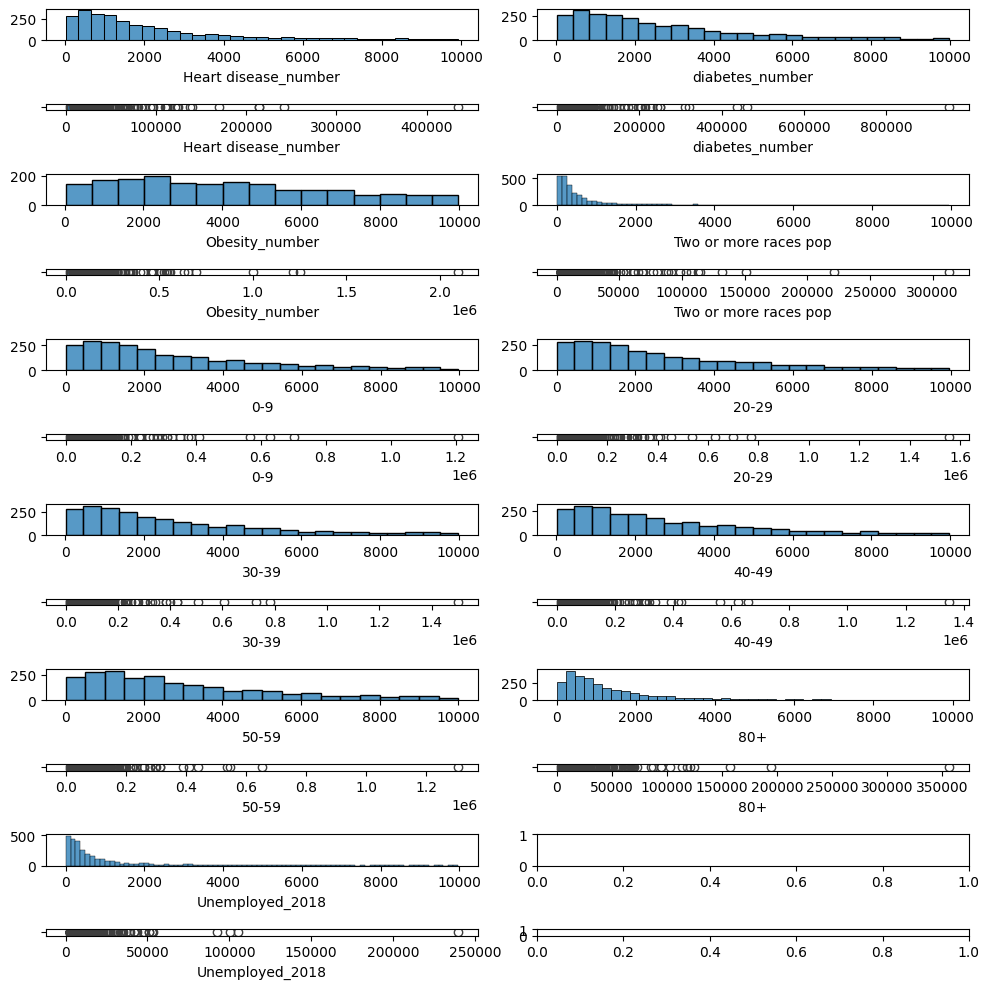

In [13]:
fig, ax = plt.subplots(12, 2, figsize=(10, 10), gridspec_kw={'height_ratios': [25,5,25,5,25,5,25,5,25,5,25,5]})

#  
sns.histplot(ax = ax[0,0], data = df_num[df_num['Heart disease_number']<10000], x='Heart disease_number').set(ylabel = None)
sns.boxplot(ax = ax[1,0], data = df_num, x='Heart disease_number')
sns.histplot(ax = ax[0,1], data = df_num[df_num['diabetes_number']<10000], x='diabetes_number').set(ylabel = None)
sns.boxplot(ax = ax[1,1], data = df_num, x='diabetes_number')

# 
sns.histplot(ax = ax[2,0], data = df_num[df_num['Obesity_number']<10000], x='Obesity_number').set(ylabel = None)
sns.boxplot(ax = ax[3,0], data = df_num, x='Obesity_number')
sns.histplot(ax = ax[2,1], data = df_num[df_num['Two or more races pop']<10000], x='Two or more races pop').set(ylabel = None)
sns.boxplot(ax = ax[3,1], data = df_num, x='Two or more races pop')

#  
sns.histplot(ax = ax[4,0], data = df_num[df_num['0-9']<10000], x='0-9').set(ylabel = None)
sns.boxplot(ax = ax[5,0], data = df_num, x='0-9')
sns.histplot(ax = ax[4,1], data = df_num[df_num['20-29']<10000], x='20-29').set(ylabel = None)
sns.boxplot(ax = ax[5,1], data = df_num, x='20-29')

# 
sns.histplot(ax = ax[6,0], data = df_num[df_num['30-39']<10000], x='30-39').set(ylabel = None)
sns.boxplot(ax = ax[7,0], data = df_num, x='30-39')
sns.histplot(ax = ax[6,1], data = df_num[df_num['40-49']<10000], x='40-49').set(ylabel = None)
sns.boxplot(ax = ax[7,1], data = df_num, x='40-49')

# 
sns.histplot(ax = ax[8,0], data = df_num[df_num['50-59']<10000], x='50-59').set(ylabel = None)
sns.boxplot(ax = ax[9,0], data = df_num, x='50-59')
sns.histplot(ax = ax[8,1], data = df_num[df_num['80+']<10000], x='80+').set(ylabel = None)
sns.boxplot(ax = ax[9,1], data = df_num, x='80+')

# 
sns.histplot(ax = ax[10,0], data = df_num[df_num['Unemployed_2018']<10000], x='Unemployed_2018').set(ylabel = None)
sns.boxplot(ax = ax[11,0], data = df_num, x='Unemployed_2018')


plt.tight_layout()
plt.show()

In [14]:
df_continuas.head()

,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Total Specialist Physicians (2019)
0,28.859137,6.085786,1.148905,72.142154
1,113.162114,23.863512,4.505074,282.882982
2,12.914231,2.723340,0.514126,32.283033
3,11.626493,2.451783,0.462860,29.063942
4,30.021267,6.330854,1.195171,75.047251


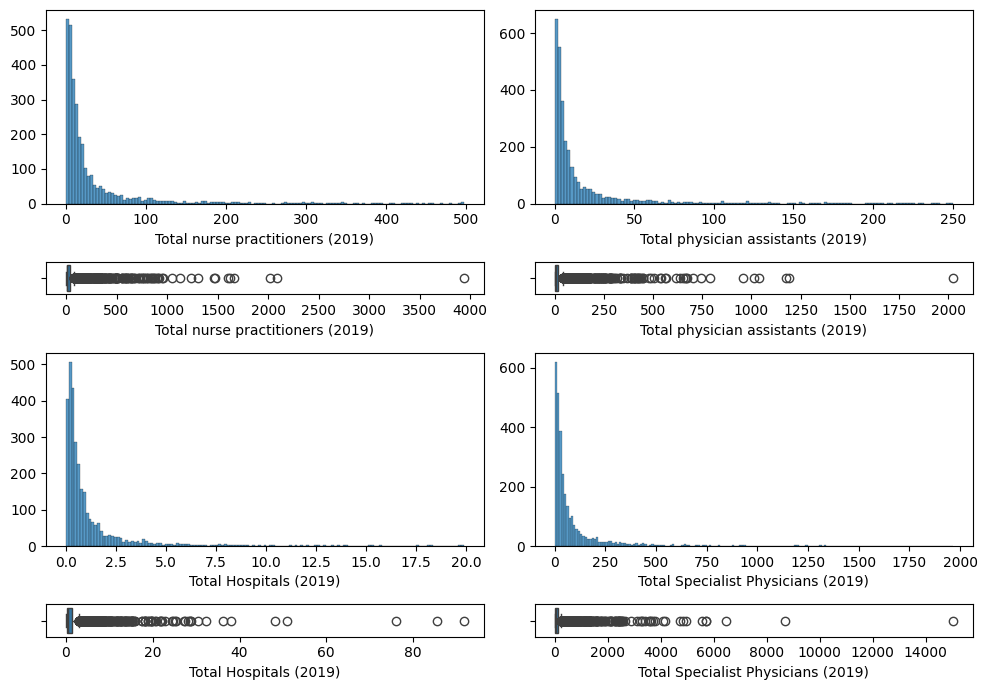

In [15]:
fig, ax = plt.subplots(4, 2, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

#  
sns.histplot(ax = ax[0,0], data = df_continuas[df_continuas['Total nurse practitioners (2019)']<500], x='Total nurse practitioners (2019)').set(ylabel = None)
sns.boxplot(ax = ax[1,0], data = df_continuas, x='Total nurse practitioners (2019)')
sns.histplot(ax = ax[0,1], data = df_continuas[df_continuas['Total physician assistants (2019)']<250], x='Total physician assistants (2019)').set(ylabel = None)
sns.boxplot(ax = ax[1,1], data = df_continuas, x='Total physician assistants (2019)')

# 
sns.histplot(ax = ax[2,0], data = df_continuas[df_continuas['Total Hospitals (2019)']<20], x='Total Hospitals (2019)').set(ylabel = None)
sns.boxplot(ax = ax[3,0], data = df_continuas, x='Total Hospitals (2019)')
sns.histplot(ax = ax[2,1], data = df_continuas[df_continuas['Total Specialist Physicians (2019)']<2000], x='Total Specialist Physicians (2019)').set(ylabel = None)
sns.boxplot(ax = ax[3,1], data = df_continuas, x='Total Specialist Physicians (2019)')

plt.tight_layout()
plt.show()

La variables predictoras núméricas cuentas con outliers que trataremos en los siguientes pasos del EDA.

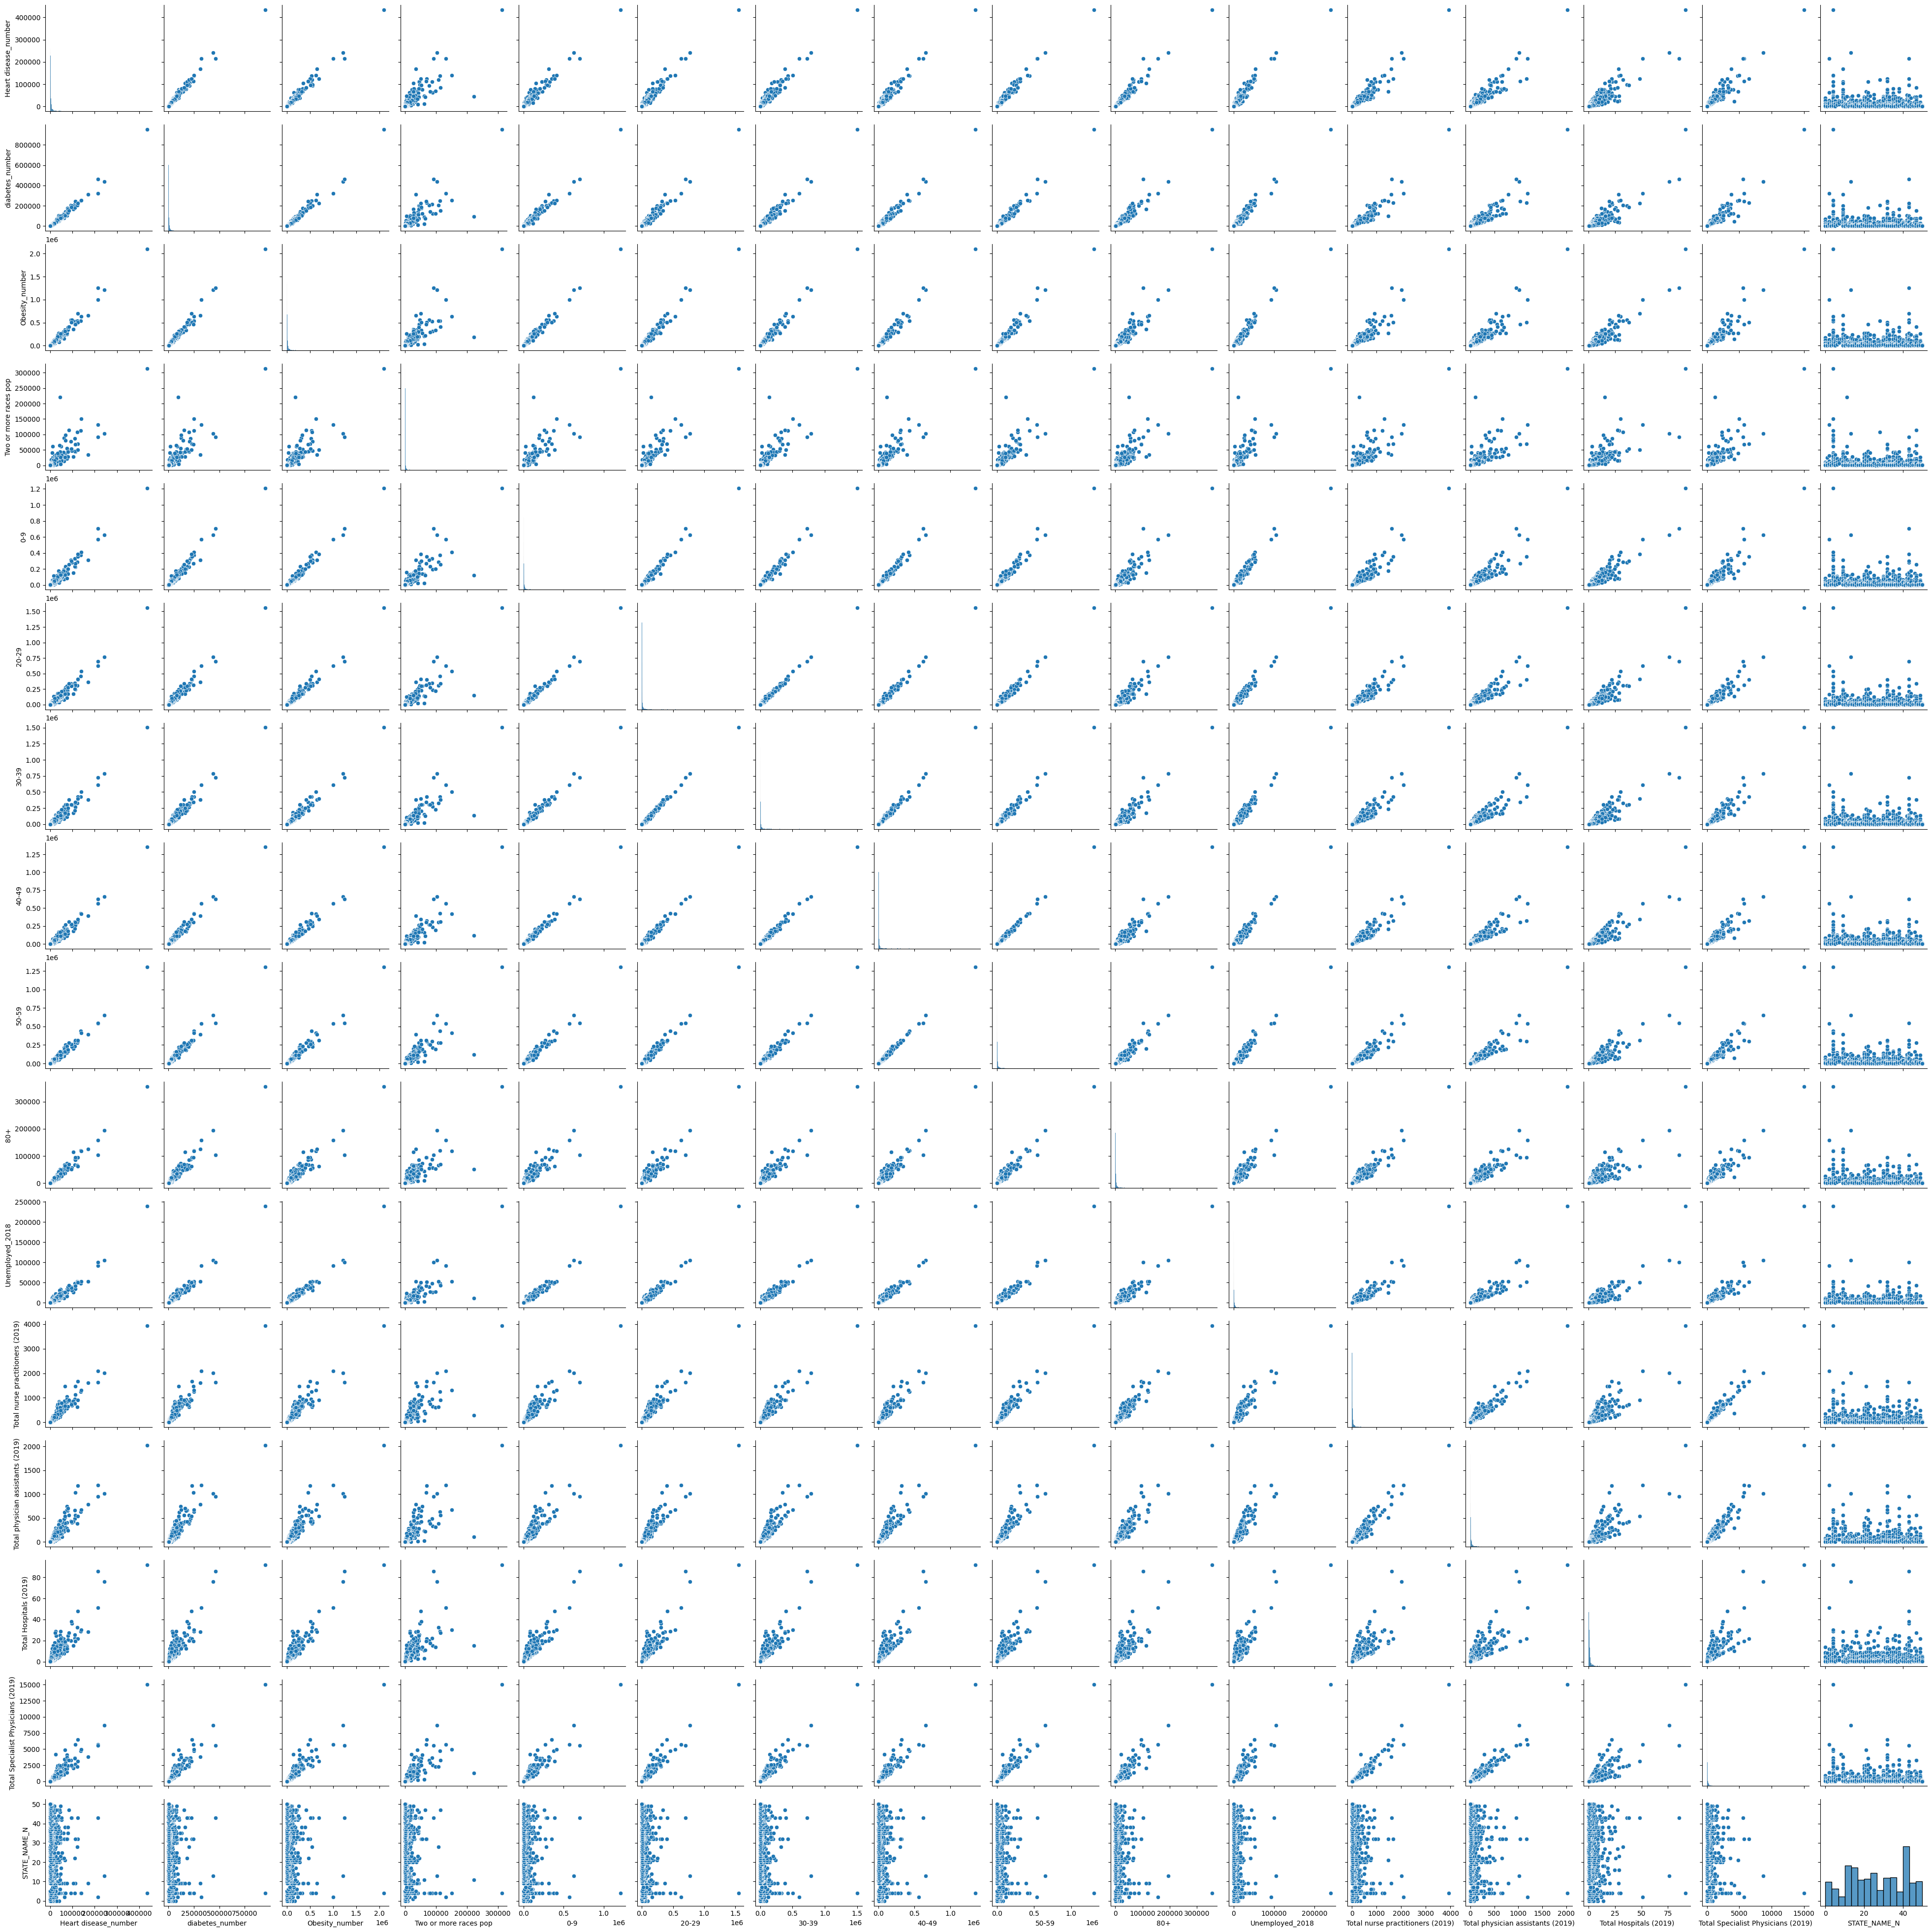

In [16]:
sns.pairplot(data=total_data)
plt.show()

In [17]:
total_data.drop(columns=['STATE_NAME'], axis=1, inplace=True)

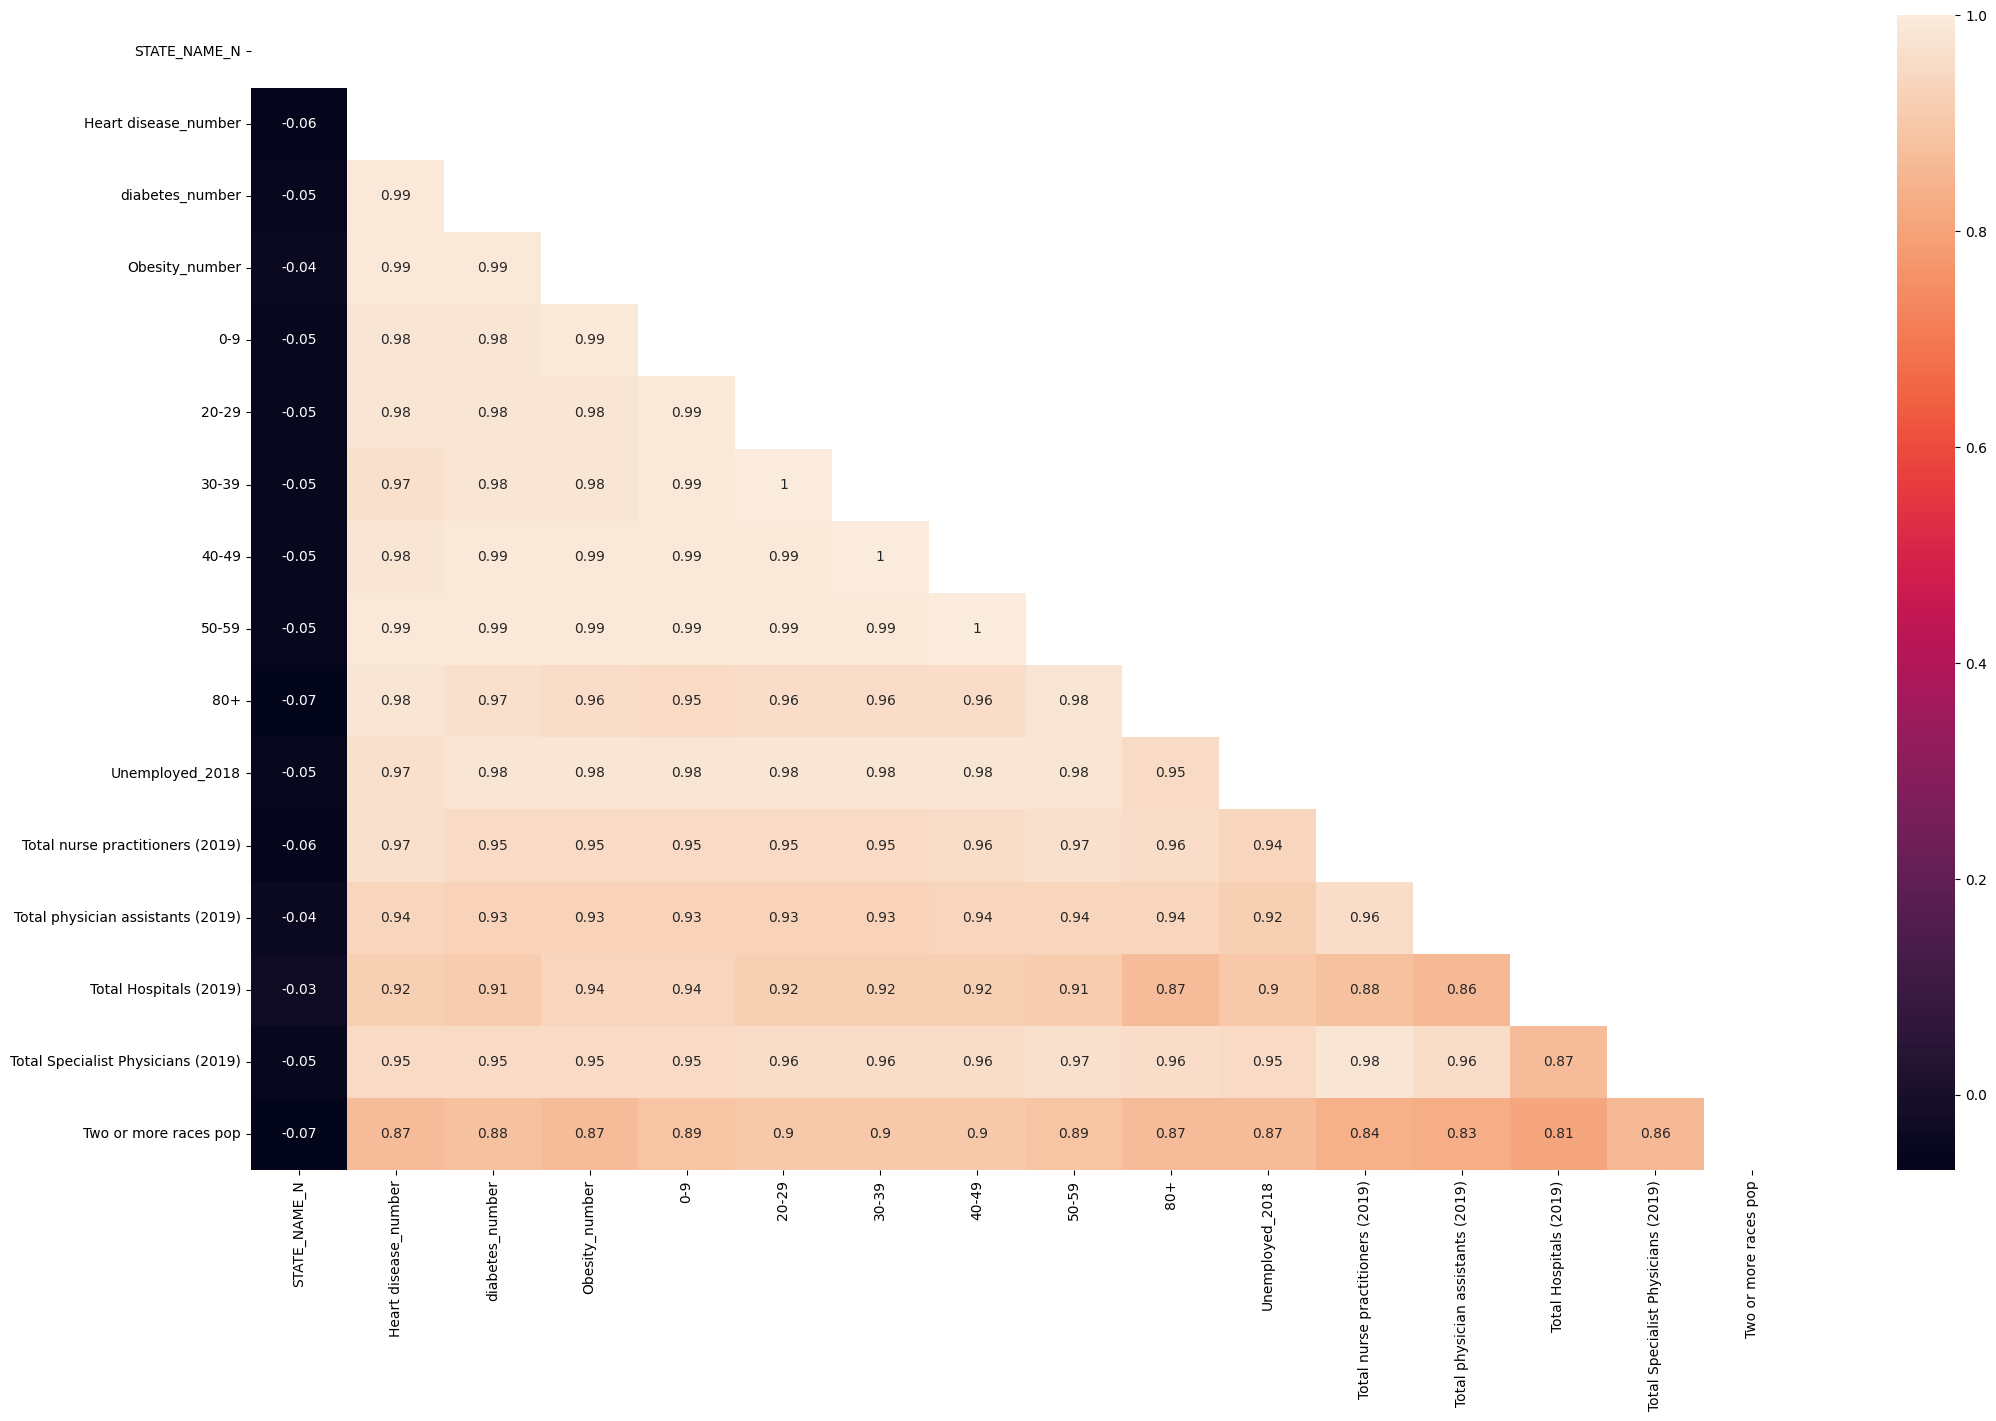

In [18]:
fig, ax = plt.subplots(figsize=(25, 15))

sns.heatmap(total_data[["STATE_NAME_N",'Heart disease_number','diabetes_number','Obesity_number','0-9', '20-29', '30-39', '40-49','50-59','80+','Unemployed_2018','Total nurse practitioners (2019)','Total physician assistants (2019)','Total Hospitals (2019)','Total Specialist Physicians (2019)','Two or more races pop']].corr().round(2), annot=True, mask= np.triu(total_data[["STATE_NAME_N",'Heart disease_number','diabetes_number','Obesity_number','0-9', '20-29', '30-39', '40-49','50-59','80+','Unemployed_2018','Total nurse practitioners (2019)','Total physician assistants (2019)','Total Hospitals (2019)','Total Specialist Physicians (2019)','Two or more races pop']].corr()))
plt.show()

Las correlacciones entre las variables es muy alta.

Feature Engineering 

Outliers

In [19]:
total_data.describe().round(2)

,Heart disease_number,diabetes_number,Obesity_number,Two or more races pop,0-9,20-29,30-39,40-49,50-59,80+,Unemployed_2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Total Specialist Physicians (2019),STATE_NAME_N
count,3140.00,3140.00,3140.00,3140.00,3140.0,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00
mean,5597.59,9326.58,25276.13,2848.95,12740.3,14469.33,13916.49,12885.21,13638.03,4035.54,2005.10,52.70,28.22,1.66,167.33,26.25
std,15615.29,29754.60,74466.84,11083.92,41807.3,49577.73,48990.95,43472.19,42720.63,12063.78,6971.12,153.88,86.41,4.29,543.04,14.26
min,7.00,11.00,25.00,0.00,0.0,0.00,11.00,4.00,14.00,0.00,0.00,0.03,0.01,0.00,0.11,0.00
25%,798.50,1187.75,3075.00,180.00,1280.5,1263.75,1232.75,1245.25,1483.00,533.00,200.75,5.44,2.48,0.25,14.74,14.00
50%,1814.50,2743.00,7182.50,437.50,3057.0,3108.00,3000.50,3048.50,3515.50,1160.00,483.00,13.08,5.97,0.52,36.22,25.00
75%,4376.00,6679.25,18542.50,1497.00,8097.0,8976.25,8314.25,8120.50,9157.25,2899.75,1276.25,35.22,18.60,1.31,103.87,40.00
max,434790.00,952335.00,2097906.00,313259.00,1208253.0,1557073.00,1501844.00,1350076.00,1306003.00,356275.00,239829.00,3937.77,2022.53,91.71,15014.05,50.00


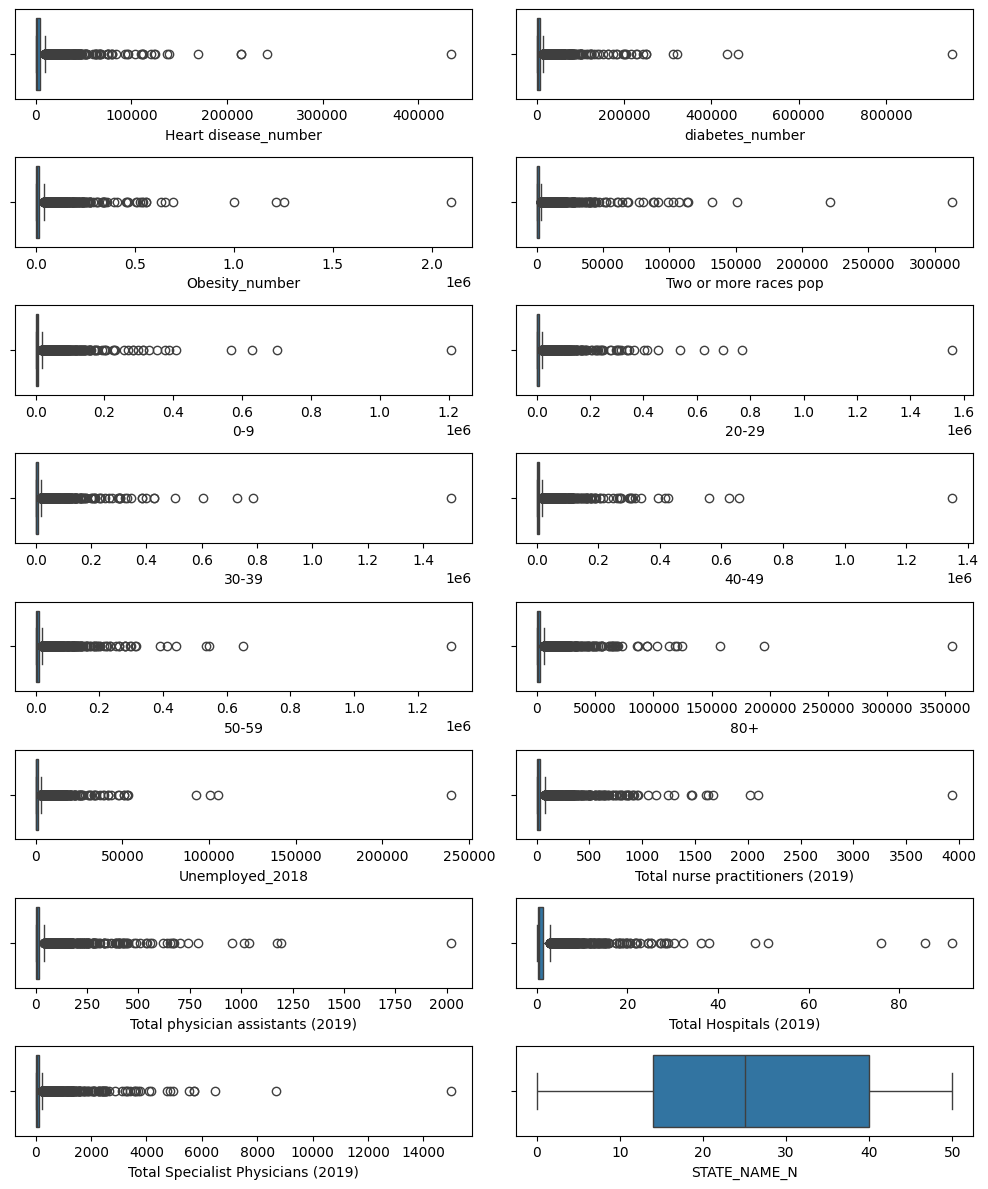

In [20]:
fig, ax = plt.subplots(8, 2, figsize=(10, 12))

sns.boxplot(ax = ax[0,0], data = total_data, x='Heart disease_number')
sns.boxplot(ax = ax[0,1], data = total_data, x='diabetes_number')

sns.boxplot(ax = ax[1,0], data = total_data, x='Obesity_number')
sns.boxplot(ax = ax[1,1], data = total_data, x='Two or more races pop')

sns.boxplot(ax = ax[2,0], data = total_data, x='0-9')
sns.boxplot(ax = ax[2,1], data = total_data, x='20-29')

sns.boxplot(ax = ax[3,0], data = total_data, x='30-39')
sns.boxplot(ax = ax[3,1], data = total_data, x='40-49')

sns.boxplot(ax = ax[4,0], data = total_data, x='50-59')
sns.boxplot(ax = ax[4,1], data = total_data, x='80+')

sns.boxplot(ax = ax[5,0], data = total_data, x='Unemployed_2018')
sns.boxplot(ax = ax[5,1], data = total_data, x='Total nurse practitioners (2019)')

sns.boxplot(ax = ax[6,0], data = total_data, x='Total physician assistants (2019)')
sns.boxplot(ax = ax[6,1], data = total_data, x='Total Hospitals (2019)')

sns.boxplot(ax = ax[7,0], data = total_data, x='Total Specialist Physicians (2019)')
sns.boxplot(ax = ax[7,1], data = total_data, x='STATE_NAME_N')


plt.tight_layout()
plt.show()

Base de datos con y sin outiliers

In [21]:
total_data_con = total_data.copy()
total_data_sin = total_data.copy()

In [22]:
Heart_disease_number_stats = total_data["Heart disease_number"].describe()
Heart_disease_number_iqr = Heart_disease_number_stats["75%"] - Heart_disease_number_stats["25%"]
upper_limit_hd = Heart_disease_number_stats["75%"] + 2 * Heart_disease_number_iqr
lower_limit_hd = Heart_disease_number_stats["25%"] - 2 * Heart_disease_number_iqr
if (lower_limit_hd<0): lower_limit_hd=0
total_data_sin["Heart disease_number"]= total_data_sin["Heart disease_number"].apply(lambda x:upper_limit_hd if (x > upper_limit_hd)else x)
print(f"Heart disease_number: los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_hd, 2)} y {round(lower_limit_hd, 2)}, con un rango intercuartílico de {round(Heart_disease_number_iqr, 2)}")
total_data_sin["Heart disease_number"].describe()

Heart disease_number: los límites superior e inferior para la búsqueda de outliers son 11531.0 y 0, con un rango intercuartílico de 3577.5


count     3140.000000
mean      3311.125478
std       3569.348653
min          7.000000
25%        798.500000
50%       1814.500000
75%       4376.000000
max      11531.000000
Name: Heart disease_number, dtype: float64

In [23]:
diabetes_number_stats = total_data["diabetes_number"].describe()

diabetes_number_iqr = diabetes_number_stats["75%"] - diabetes_number_stats["25%"]
upper_limit_dn = diabetes_number_stats["75%"] + 2 * diabetes_number_iqr
lower_limit_dn = diabetes_number_stats["25%"] - 2 * diabetes_number_iqr
if (lower_limit_dn<0): lower_limit_dn=0
total_data_sin["diabetes_number"]= total_data_sin["diabetes_number"].apply(lambda x:upper_limit_dn if (x > upper_limit_dn)else x)
print(f"diabetes_number: los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_dn, 2)} y {round(lower_limit_dn, 2)}, con un rango intercuartílico de {round(diabetes_number_iqr, 2)}")
total_data_sin["diabetes_number"].describe()

diabetes_number: los límites superior e inferior para la búsqueda de outliers son 17662.25 y 0, con un rango intercuartílico de 5491.5


count     3140.000000
mean      5084.057086
std       5534.024733
min         11.000000
25%       1187.750000
50%       2743.000000
75%       6679.250000
max      17662.250000
Name: diabetes_number, dtype: float64

In [24]:
Unemployed_2018_stats = total_data['Unemployed_2018'].describe()
Unemployed_2018_iqr = Unemployed_2018_stats["75%"] - Unemployed_2018_stats["25%"]
upper_limit_u = Unemployed_2018_stats["75%"] + 2 * Unemployed_2018_iqr
lower_limit_u = Unemployed_2018_stats["25%"] - 2 * Unemployed_2018_iqr
if (lower_limit_u<0): lower_limit_u=0
total_data_sin["Unemployed_2018"]= total_data_sin["Unemployed_2018"].apply(lambda x:upper_limit_u if (x > upper_limit_u)else x)
print(f"Unemployed_2018: los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_u, 2)} y {round(lower_limit_u, 2)}, con un rango intercuartílico de {round(Unemployed_2018_iqr, 2)}")
total_data_sin["Unemployed_2018"].describe()

Unemployed_2018: los límites superior e inferior para la búsqueda de outliers son 3427.25 y 0, con un rango intercuartílico de 1075.5


count    3140.000000
mean      981.780732
std      1108.218818
min         0.000000
25%       200.750000
50%       483.000000
75%      1276.250000
max      3427.250000
Name: Unemployed_2018, dtype: float64

In [25]:
Total_nurse_practitioners_2019_stats = total_data['Total nurse practitioners (2019)'].describe()
Total_nurse_practitioners_2019_iqr = Total_nurse_practitioners_2019_stats["75%"] - Total_nurse_practitioners_2019_stats["25%"]
upper_limit_tn = Total_nurse_practitioners_2019_stats["75%"] + 2 * Total_nurse_practitioners_2019_iqr
lower_limit_tn = Total_nurse_practitioners_2019_stats["25%"] - 2 * Total_nurse_practitioners_2019_iqr
if (lower_limit_tn<0): lower_limit_tn=0
total_data_sin["Total nurse practitioners (2019)"]= total_data_sin["Total nurse practitioners (2019)"].apply(lambda x:upper_limit_tn if (x > upper_limit_tn)else x)
print(f"Total nurse practitioners (2019): los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_tn, 2)} y {round(lower_limit_tn, 2)}, con un rango intercuartílico de {round(Total_nurse_practitioners_2019_iqr, 2)}")
total_data_sin["Total nurse practitioners (2019)"].describe()

Total nurse practitioners (2019): los límites superior e inferior para la búsqueda de outliers son 94.77 y 0, con un rango intercuartílico de 29.78


count    3140.000000
mean       27.006892
std        30.658836
min         0.025524
25%         5.439135
50%        13.076544
75%        35.215580
max        94.768470
Name: Total nurse practitioners (2019), dtype: float64

In [26]:
Total_physician_assistants_2019_stats = total_data['Total physician assistants (2019)'].describe()
Total_physician_assistants_2019_iqr = Total_physician_assistants_2019_stats["75%"] - Total_physician_assistants_2019_stats["25%"]
upper_limit_tf = Total_physician_assistants_2019_stats["75%"] + 2 * Total_physician_assistants_2019_iqr
lower_limit_tf = Total_physician_assistants_2019_stats["25%"] - 2 * Total_physician_assistants_2019_iqr
if (lower_limit_tf<0): lower_limit_tf=0
total_data_sin["Total physician assistants (2019)"]= total_data_sin["Total physician assistants (2019)"].apply(lambda x:upper_limit_tf if (x > upper_limit_tf)else x)
print(f"Total physician assistants (2019): los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_tf, 2)} y {round(lower_limit_tf, 2)}, con un rango intercuartílico de {round(Total_physician_assistants_2019_iqr, 2)}")
total_data_sin["Total physician assistants (2019)"].describe()

Total physician assistants (2019): los límites superior e inferior para la búsqueda de outliers son 50.84 y 0, con un rango intercuartílico de 16.12


count    3140.000000
mean       13.838839
std        16.575715
min         0.009726
25%         2.475921
50%         5.969606
75%        18.598497
max        50.843648
Name: Total physician assistants (2019), dtype: float64

In [27]:
Total_Hospitals_2019_stats = total_data['Total Hospitals (2019)'].describe()
Total_Hospitals_2019_iqr = Total_Hospitals_2019_stats["75%"] - Total_Hospitals_2019_stats["25%"]
upper_limit_th = Total_Hospitals_2019_stats["75%"] + 2 * Total_Hospitals_2019_iqr
lower_limit_th = Total_Hospitals_2019_stats["25%"] - 2 * Total_Hospitals_2019_iqr
if (lower_limit_th<0): lower_limit_th=0
total_data_sin["Total Hospitals (2019)"]= total_data_sin["Total Hospitals (2019)"].apply(lambda x:upper_limit_th if (x > upper_limit_th)else x)
print(f"Total Hospitals (2019): los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_th, 2)} y {round(lower_limit_th, 2)}, con un rango intercuartílico de {round(Total_Hospitals_2019_iqr, 2)}")
total_data_sin["Total Hospitals (2019)"].describe()

Total Hospitals (2019): los límites superior e inferior para la búsqueda de outliers son 3.44 y 0, con un rango intercuartílico de 1.06


count    3140.000000
mean        0.998801
std         1.072731
min         0.001363
25%         0.248797
50%         0.524404
75%         1.311585
max         3.437162
Name: Total Hospitals (2019), dtype: float64

In [28]:
Total_Specialist_Physicians_2019_stats = total_data['Total Specialist Physicians (2019)'].describe()
Total_Specialist_Physicians_2019_iqr = Total_Specialist_Physicians_2019_stats["75%"] - Total_Specialist_Physicians_2019_stats["25%"]
upper_limit_ts = Total_Specialist_Physicians_2019_stats["75%"] + 2 * Total_Specialist_Physicians_2019_iqr
lower_limit_ts = Total_Specialist_Physicians_2019_stats["25%"] - 2 * Total_Specialist_Physicians_2019_iqr
if (lower_limit_ts<0): lower_limit_ts=0
total_data_sin["Total Specialist Physicians (2019)"]= total_data_sin["Total Specialist Physicians (2019)"].apply(lambda x:upper_limit_ts if (x > upper_limit_ts)else x)
print(f"Total Specialist Physicians (2019): los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_ts, 2)} y {round(lower_limit_ts, 2)}, con un rango intercuartílico de {round(Total_Specialist_Physicians_2019_iqr, 2)}")
total_data_sin["Total Specialist Physicians (2019)"].describe()

Total Specialist Physicians (2019): los límites superior e inferior para la búsqueda de outliers son 282.13 y 0, con un rango intercuartílico de 89.13


count    3140.000000
mean       79.386224
std        92.204133
min         0.111759
25%        14.740077
50%        36.223582
75%       103.869345
max       282.127880
Name: Total Specialist Physicians (2019), dtype: float64

In [29]:
Two_or_more_racesp_op_2019_stats = total_data['Two or more races pop'].describe()
Two_or_more_racesp_op_2019_iqr = Two_or_more_racesp_op_2019_stats["75%"] - Two_or_more_racesp_op_2019_stats["25%"]
upper_limit_race = Two_or_more_racesp_op_2019_stats["75%"] + 2 * Two_or_more_racesp_op_2019_iqr
lower_limit_race = Two_or_more_racesp_op_2019_stats["25%"] - 2 * Two_or_more_racesp_op_2019_iqr
if (lower_limit_race<0): lower_limit_reca=0
total_data_sin["Two or more races pop"]= total_data_sin["Two or more races pop"].apply(lambda x:upper_limit_race if (x > upper_limit_race)else x)
print(f"Two or more races pop: los límites superior e inferior para la búsqueda de outliers son {round(upper_limit_race, 2)} y {round(lower_limit_race, 2)}, con un rango intercuartílico de {round(Two_or_more_racesp_op_2019_iqr, 2)}")
total_data_sin["Two or more races pop"].describe()

Two or more races pop: los límites superior e inferior para la búsqueda de outliers son 4131.0 y -2454.0, con un rango intercuartílico de 1317.0


count    3140.000000
mean     1127.063376
std      1390.499401
min         0.000000
25%       180.000000
50%       437.500000
75%      1497.000000
max      4131.000000
Name: Two or more races pop, dtype: float64

In [30]:
total_data_sin.describe()

,Heart disease_number,diabetes_number,Obesity_number,Two or more races pop,0-9,20-29,30-39,40-49,50-59,80+,Unemployed_2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Total Specialist Physicians (2019),STATE_NAME_N
count,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,3311.125478,5084.057086,2.527613e+04,1127.063376,1.274030e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,4035.541720,981.780732,27.006892,13.838839,0.998801,79.386224,26.253503
std,3569.348653,5534.024733,7.446684e+04,1390.499401,4.180730e+04,4.957773e+04,4.899095e+04,4.347219e+04,4.272063e+04,12063.782251,1108.218818,30.658836,16.575715,1.072731,92.204133,14.260381
min,7.000000,11.000000,2.500000e+01,0.000000,0.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,0.000000,0.000000,0.025524,0.009726,0.001363,0.111759,0.000000
25%,798.500000,1187.750000,3.075000e+03,180.000000,1.280500e+03,1.263750e+03,1.232750e+03,1.245250e+03,1.483000e+03,533.000000,200.750000,5.439135,2.475921,0.248797,14.740077,14.000000
50%,1814.500000,2743.000000,7.182500e+03,437.500000,3.057000e+03,3.108000e+03,3.000500e+03,3.048500e+03,3.515500e+03,1160.000000,483.000000,13.076544,5.969606,0.524404,36.223582,25.000000
75%,4376.000000,6679.250000,1.854250e+04,1497.000000,8.097000e+03,8.976250e+03,8.314250e+03,8.120500e+03,9.157250e+03,2899.750000,1276.250000,35.215580,18.598497,1.311585,103.869345,40.000000
max,11531.000000,17662.250000,2.097906e+06,4131.000000,1.208253e+06,1.557073e+06,1.501844e+06,1.350076e+06,1.306003e+06,356275.000000,3427.250000,94.768470,50.843648,3.437162,282.127880,50.000000


ANÁLISIS DE VALORES FALTANTES / isnull()

In [31]:
total_data_sin.isnull().sum().sort_values(ascending=True)

Heart disease_number                  0
diabetes_number                       0
Obesity_number                        0
Two or more races pop                 0
0-9                                   0
20-29                                 0
30-39                                 0
40-49                                 0
50-59                                 0
80+                                   0
Unemployed_2018                       0
Total nurse practitioners (2019)      0
Total physician assistants (2019)     0
Total Hospitals (2019)                0
Total Specialist Physicians (2019)    0
STATE_NAME_N                          0
dtype: int64

ESCALADO DE VALORES (feature scaling)

In [32]:
total_data.head()

,Heart disease_number,diabetes_number,Obesity_number,Two or more races pop,0-9,20-29,30-39,40-49,50-59,80+,Unemployed_2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Total Specialist Physicians (2019),STATE_NAME_N
0,3345,5462,15193,1016,6787,6878,7089,7582,7738,2014,942,28.859137,6.085786,1.148905,72.142154,0
1,13414,20520,50761,3891,24757,23579,25213,27338,29986,9368,3393,113.162114,23.863512,4.505074,282.882982,0
2,2159,3870,8013,307,2732,3268,3201,3074,3278,1048,433,12.914231,2.723340,0.514126,32.283033,0
3,1533,2511,6894,242,2456,3029,3113,3038,3115,785,344,11.626493,2.451783,0.462860,29.063942,0
4,4101,6017,15112,801,7095,6742,6884,7474,7844,2335,878,30.021267,6.330854,1.195171,75.047251,0


In [33]:
from sklearn.model_selection import train_test_split

num_variables = ["Heart disease_number","diabetes_number","Two or more races pop","0-9","20-29","30-39","40-49","50-59","80+","Unemployed_2018","Total nurse practitioners (2019)","Total physician assistants (2019)","Total Hospitals (2019)","Total Specialist Physicians (2019)","STATE_NAME_N"]

# # Dividimos el conjunto de datos en muestras de train y test
X_con = total_data_con.drop("Obesity_number", axis = 1)[num_variables]
y_con = total_data_con["Obesity_number"]
X_sin = total_data_sin.drop("Obesity_number", axis = 1)[num_variables]
y_sin = total_data_sin["Obesity_number"]

X_con_train, X_con_test, y_train, y_test = train_test_split(X_con, y_con, test_size = 0.2, random_state = 42)
X_sin_train, X_sin_test,_,_ = train_test_split(X_sin, y_sin, test_size = 0.2, random_state = 42)


In [34]:
X_con_train.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/X_con_train.csv", index=False)
X_con_test.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/X_con_test.csv", index=False)
X_sin_train.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/X_sin_train.csv", index=False)
X_sin_test.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/X_sin_test.csv", index=False)
y_train.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/y_train.csv", index=False)
y_test.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/y_test.csv", index=False)

NORMALIZACIÓN

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_con_train)
scaler.fit(X_sin_train)

X_con_train_norm = scaler.transform(X_con_train)
X_con_train_norm = pd.DataFrame(X_con_train_norm, index = X_con_train.index, columns = num_variables)

X_sin_train_norm = scaler.transform(X_sin_train)
X_sin_train_norm = pd.DataFrame(X_sin_train_norm, index = X_sin_train.index, columns = num_variables)


X_con_test_norm = scaler.transform(X_con_test)
X_con_test_norm = pd.DataFrame(X_con_test_norm, index = X_con_test.index, columns = num_variables)


X_sin_test_norm = scaler.transform(X_sin_test)
X_sin_test_norm = pd.DataFrame(X_sin_test_norm, index = X_sin_test.index, columns = num_variables)

In [36]:
X_con_train_norm.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/X_con_train_norm.csv", index=False)
X_con_test_norm.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/X_con_test_norm.csv", index=False)
X_sin_train_norm.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/X_sin_train_norm.csv", index=False)
X_sin_test_norm.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/X_sin_test_norm.csv", index=False)

ESCALADO MÍNIMO-MÁXIMO

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_con_train)


X_con_train_scal = scaler.transform(X_con_train)
X_con_train_scal = pd.DataFrame(X_con_train_scal, index = X_con_train.index, columns = num_variables)

X_con_test_scal = scaler.transform(X_con_test)
X_con_test_scal = pd.DataFrame(X_con_test_scal, index = X_con_test.index, columns = num_variables)

X_con_train_scal.head()

,Heart disease_number,diabetes_number,Two or more races pop,0-9,20-29,30-39,40-49,50-59,80+,Unemployed_2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Total Specialist Physicians (2019),STATE_NAME_N
1292,0.004749,0.002953,0.001427,0.002666,0.001877,0.001876,0.002094,0.002923,0.003391,0.003169,0.002983,0.004977,0.004167,0.003594,0.44
2302,0.008715,0.005676,0.002072,0.004363,0.003299,0.003549,0.004352,0.006027,0.008218,0.004603,0.007112,0.011215,0.008671,0.007129,0.76
761,0.005094,0.003872,0.001753,0.003240,0.003983,0.002898,0.003294,0.003900,0.004381,0.002656,0.004944,0.002354,0.008111,0.003266,0.28
2194,0.012597,0.008298,0.024711,0.009239,0.007447,0.007555,0.008474,0.009770,0.009762,0.006184,0.006694,0.014851,0.031781,0.007236,0.72
1241,0.019962,0.013626,0.015071,0.013820,0.011098,0.010642,0.011733,0.013758,0.016950,0.011033,0.015095,0.025160,0.021110,0.018186,0.44


In [38]:
scaler.fit(X_sin_train)

X_sin_train_scal = scaler.transform(X_sin_train)
X_sin_train_scal = pd.DataFrame(X_sin_train_scal, index = X_sin_train.index, columns = num_variables)

X_sin_test_scal = scaler.transform(X_sin_test)
X_sin_test_scal = pd.DataFrame(X_sin_test_scal, index = X_sin_test.index, columns = num_variables)

X_sin_train_scal.head()

,Heart disease_number,diabetes_number,Two or more races pop,0-9,20-29,30-39,40-49,50-59,80+,Unemployed_2018,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Total Specialist Physicians (2019),STATE_NAME_N
1292,0.179191,0.159309,0.108206,0.002666,0.001877,0.001876,0.002094,0.002923,0.003391,0.221752,0.123994,0.198030,0.111239,0.191362,0.44
2302,0.328792,0.306211,0.157105,0.004363,0.003299,0.003549,0.004352,0.006027,0.008218,0.322124,0.295612,0.446218,0.231452,0.379536,0.76
761,0.192208,0.208880,0.132898,0.003240,0.003983,0.002898,0.003294,0.003900,0.004381,0.185863,0.205486,0.093652,0.216498,0.173884,0.28
2194,0.475269,0.447674,1.000000,0.009239,0.007447,0.007555,0.008474,0.009770,0.009762,0.432708,0.278210,0.590879,0.848313,0.385238,0.72
1241,0.753124,0.735132,1.000000,0.013820,0.011098,0.010642,0.011733,0.013758,0.016950,0.772048,0.627403,1.000000,0.563491,0.968203,0.44


In [39]:
X_con_train_scal.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/X_con_train_scal.csv", index=False)
X_con_test_scal.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/X_con_test_scal.csv", index=False)
X_sin_train_scal.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/X_sin_train_scal.csv", index=False)
X_sin_test_scal.to_csv("/workspaces/Regr_Lineal_Regularizada/data/processed/X_sin_test_scal.csv", index=False)

LASSO

Creamos un diccionario con los dfs:

In [40]:
print(y_test)

2893     2769
2968    63722
1064     5927
1231    27220
2987    45626
        ...  
1351     7200
670      1501
2283    12205
2482    29612
2650    11982
Name: Obesity_number, Length: 628, dtype: int64


In [41]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

dfs_train=[
    X_con_train_norm,
    X_sin_train_norm,
    X_con_train_scal,
    X_sin_train_scal
]

dfs_test=[
    X_con_test_norm,
    X_sin_test_norm,
    X_con_test_scal,
    X_sin_test_scal
]

results = []
models=[]

for df_index in range(len(dfs_train)):
  lasso_model = Lasso(alpha = 0.1, max_iter = 300)
  df_train = dfs_train[df_index]
  lasso_model.fit(df_train, y_train)
  y_train_pred = lasso_model.predict(df_train)
  y_test_pred = lasso_model.predict(dfs_test[df_index])


  results.append(
    {
        "index": df_index,
        'Coef':lasso_model.coef_,
        'MAE': mean_absolute_error(y_test, y_test_pred).round(2),
        'RMSE': round(root_mean_squared_error(y_test, y_test_pred),2),
        "R2_score": r2_score(y_test, y_test_pred)
    }
  )

sorted(results, key = lambda x: x["R2_score"], reverse = True)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.209e+10, tolerance: 1.602e+09
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.317e+10, tolerance: 1.602e+09
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

[{'index': 0,
  'Coef': array([ 11177.84060462,    859.37539771,   -301.65671752,  24905.57708831,
           6206.47453155,  -6031.85952074,  -2636.6751197 ,  12680.00223291,
         -20013.15764403,    795.49906228,   -344.50770531,   -658.14838564,
           1497.59726281,    538.0210448 ,    405.5536141 ]),
  'MAE': np.float64(1744.99),
  'RMSE': np.float64(5300.4),
  'R2_score': 0.9871515855471448},
 {'index': 2,
  'Coef': array([1347695.25084948,  145741.81799353,  -68430.40628298,
          666331.32875706,  168925.16930064, -151707.35524241,
          -61538.56465075,  338379.06982545, -535929.96540585,
          172781.80556731,  -40607.15695353,  -78600.02538756,
          127028.96131626,   81786.32372489,    1438.09959356]),
  'MAE': np.float64(1748.8),
  'RMSE': np.float64(5309.11),
  'R2_score': 0.9871092965559599},
 {'index': 1,
  'Coef': array([  2745.23242688,   2188.12846462,  -1046.98768151,  70709.94010179,
           3766.75893735, -11099.62639582,  -9621.9007247

Ridge

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

dfs_train=[
    X_con_train_norm,
    X_sin_train_norm,
    X_con_train_scal,
    X_sin_train_scal
]

dfs_test=[
    X_con_test_norm,
    X_sin_test_norm,
    X_con_test_scal,
    X_sin_test_scal
]

results = []
models=[]

for df_index in range(len(dfs_train)):
  ridge_model = Ridge(alpha = 0.1, max_iter = 300)
  df_train = dfs_train[df_index]
  ridge_model.fit(df_train, y_train)
  y_train_pred = ridge_model.predict(df_train)
  y_test_pred = ridge_model.predict(dfs_test[df_index])

  results.append(
    {
        "index": df_index,
        'Coef':ridge_model.coef_,
        'MAE': mean_absolute_error(y_test, y_test_pred).round(2),
        'RMSE': round(root_mean_squared_error(y_test, y_test_pred),2),
        "R2_score": r2_score(y_test, y_test_pred)
    }
  )

sorted(results, key = lambda x: x["R2_score"], reverse = True)

[{'index': 0,
  'Coef': array([ 10311.38900621,    888.10986004,   -316.48390176,  27075.23799149,
           3518.85094526,   7839.86351029, -37221.76991212,  36827.2079981 ,
         -20849.4593378 ,   1343.87924534,   -148.04489102,   -455.49243005,
           1553.86345678,   -130.18519558,    401.98917286]),
  'MAE': np.float64(1696.0),
  'RMSE': np.float64(5107.64),
  'R2_score': 0.9880691028817803},
 {'index': 2,
  'Coef': array([467443.00908771, 337173.59154622, -67219.05609131, 384546.04154902,
         147534.31211919,  73186.40263164, 116408.06596475, 153688.85774061,
         -25710.65382122, 269250.01349418,  41632.30942644,   5106.04731484,
         266388.52514171, -21852.53139727,   1454.64532234]),
  'MAE': np.float64(2095.54),
  'RMSE': np.float64(6027.33),
  'R2_score': 0.9833856411511699},
 {'index': 1,
  'Coef': array([ 2.35828105e+03,  2.42159765e+03, -1.15649631e+03,  7.19357756e+04,
          2.10644346e+03, -3.92909040e+01, -3.27010186e+04,  3.22890638e+04,
   

Los datos más convenientes para nuestro modelo corresponde a la base de datos con outliers normalizado.